In [1]:
# As bibliotecas Python formam um conjunto de módulos e funções úteis que reduzem o uso de código no programa. 
# Através das bilbiotecas é possível fazer tratamento de dados utilizando a lingauem de programação Python.

import numpy as np # suporta processamento de grandes, multi-dimensionais arranjos e matrizes
import pandas as pd # estruturas e operações para manipular tabelas numéricas e séries temporais
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações de dados em geral
import seaborn as sns # interface de alto nível para desenhar gráficos estatísticos
import datetime # módulo que fornece classes para manipulação de datas e horas
from matplotlib import cm # mapas de cores integrados, utilitários de manipulação de mapas de cores


C:\Users\nowadzki\.conda\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# puxar os dados do arquivo csv para o dataframe (base de dados)

data = pd.read_csv('bitcoin.csv')

In [3]:
# observar as colunas com os dados obtendo um panorama geral sobre os tipos de dados e seu conteúdo

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [4]:
# organizar o nome das colunas, renomear para um padrão mais legível e tratar a base de dados

data = data.rename(columns={"Volume_(BTC)": "Volume_BTC", "Volume_(Currency)": "Volume_Currency"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Timestamp        int64  
 1   Open             float64
 2   High             float64
 3   Low              float64
 4   Close            float64
 5   Volume_BTC       float64
 6   Volume_Currency  float64
 7   Weighted_Price   float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
# transformar a nomenclatura das colunas de caixa alta para baixa, facilitando a legibilidade do código

data.columns= data.columns.str.lower()
data.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume_btc',
       'volume_currency', 'weighted_price'],
      dtype='object')

In [6]:
# para ver os primeiros cinco dados na base de dados
# para ver mais ou menos de cinco dados é necessário informar o número entre colchetes -> data.head(10)
# data.tail() # comando para observar os cinco dados finais da base de dados

data.head()

,timestamp,open,high,low,close,volume_btc,volume_currency,weighted_price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# existem valores nulos (NaN) e é necessário limpar os dados ausentes (fase de tratamento e pré processamento)
# ao rodapé temos o valor de 3.613.769 linhas e 8 colunas, mostrando a dimensão da base de dados

data = data.dropna(how='any',axis=0)
data

,timestamp,open,high,low,close,volume_btc,volume_currency,weighted_price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [8]:
# informação sobre a base de dados após o tratamento da mesma

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        int64  
 1   open             float64
 2   high             float64
 3   low              float64
 4   close            float64
 5   volume_btc       float64
 6   volume_currency  float64
 7   weighted_price   float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


In [9]:
# primeira fase da visualização de dados, a apresentação da matriz de correlação
# a correlação nos ajuda a descobrir quais dos campos estão relacionados entre si

data.corr()

,timestamp,open,high,low,close,volume_btc,volume_currency,weighted_price
timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737
open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
high,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
volume_btc,-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
volume_currency,0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
weighted_price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


<AxesSubplot:>

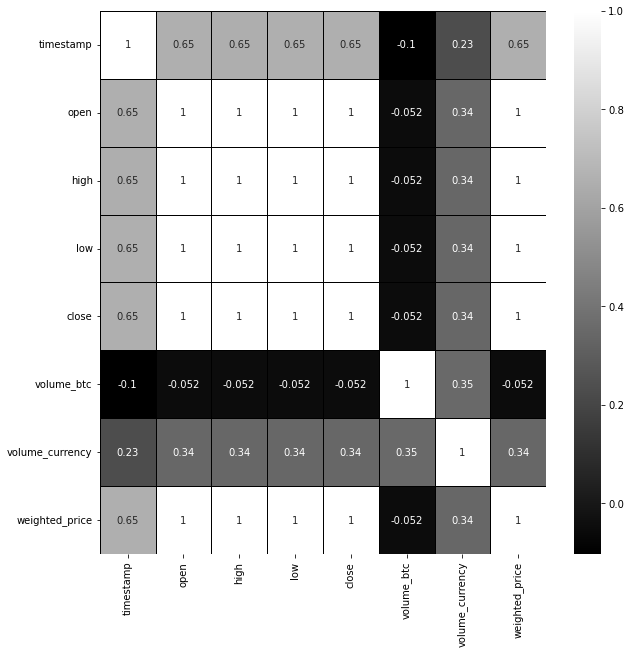

In [10]:
# a matriz de correlação pode ser apresentada de forma gráfica 
# como exemplo, a correlação entre close e low é igual a 1. 
# isso significa que quando low aumenta, close aumenta na mesma proporção.


plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='gray', linewidths=1, linecolor='black')

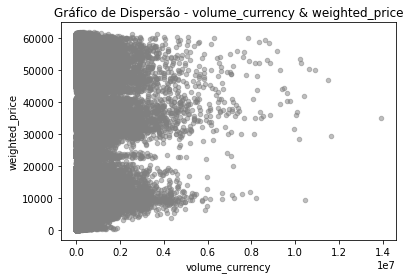

In [11]:
# gráfico de dispersão
# é possível observar no gráfico de dispersão que quando o volume de moeda aumenta o preço ponderado também aumenta
# x = volume_currency, y = weighted_price

data.plot(kind='scatter', x='volume_currency', y='weighted_price',alpha = 0.5, color = 'gray')
plt.xlabel('volume_currency')
plt.ylabel('weighted_price')
plt.title('Gráfico de Dispersão - volume_currency & weighted_price')
plt.show()

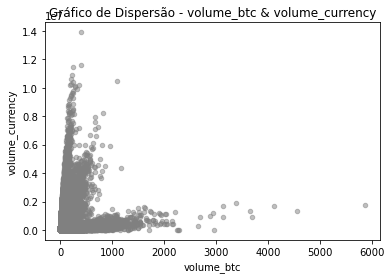

In [12]:
# gráfico de dispersão de volume_btc & volume_currency

data.plot(kind = 'scatter', x = 'volume_btc', y = 'volume_currency', alpha = 0.5, color='gray')
plt.xlabel('volume_btc')
plt.ylabel('volume_currency')
plt.title('Gráfico de Dispersão - volume_btc & volume_currency')
plt.show()

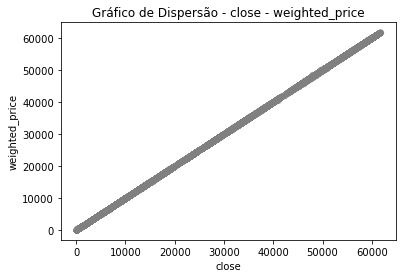

In [13]:
# gráfico de dispersão de close & weighted_price

data.plot(kind='scatter', x ='close', y = 'weighted_price', alpha=0.5,color = 'gray')
plt.xlabel('close') 
plt.ylabel('weighted_price')
plt.title('Gráfico de Dispersão - close - weighted_price') 
plt.show()

<AxesSubplot:ylabel='Frequency'>

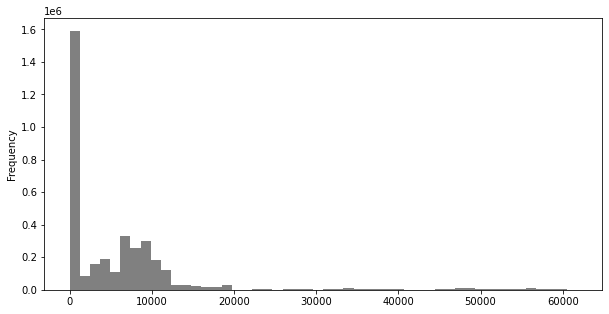

In [14]:
# Histograma
# gráfico de barras que demonstra uma distribuição de frequências
# a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta 
# com que o valor de cada classe que ocorre
# barras = número de weighted_price (preço ponderado) na figura

data.weighted_price.plot(kind = 'hist',bins = 50,figsize = (10,5), color='gray')

In [15]:
# filtragem de dados por preço > 60K (dias em que o preço ponderado se manteve acima dos 60 mil dólares)

x = data['weighted_price']>60000
data[x]

,timestamp,open,high,low,close,volume_btc,volume_currency,weighted_price
4832145,1615634940,59999.99,60120.00,59600.00,59600.00,105.118556,6.310931e+06,60036.321517
4832152,1615635360,59909.39,60020.09,59893.51,60016.59,34.204273,2.052301e+06,60001.315953
4832153,1615635420,60016.59,60056.30,59888.33,59938.28,43.326245,2.599946e+06,60008.567209
4832163,1615636020,60023.00,60046.91,60000.00,60036.33,15.738749,9.443640e+05,60002.481962
4832197,1615638060,59956.24,60040.94,59930.23,60040.94,7.482988,4.490368e+05,60007.679456
...,...,...,...,...,...,...,...,...
4834617,1615783260,60103.98,60104.17,60070.63,60078.30,1.331605,8.001855e+04,60091.791290
4834618,1615783320,60112.58,60132.23,60092.62,60092.62,0.946502,5.688899e+04,60104.455935
4834619,1615783380,60097.07,60097.08,60050.24,60052.58,0.933157,5.606157e+04,60077.341915
4834620,1615783440,60003.09,60087.12,59997.04,60050.00,2.856830,1.715214e+05,60039.079013


In [16]:
# para visualizar o histórico de preços com os dados pré tratados podemos puxar novamente a base de dados
# e podemos elencar as colunas com os dados necessários para visualizar esse gráfico

data =pd.read_csv('bitcoin.csv')
data = data[['Timestamp','Close','Volume_(BTC)']]
data['Timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data = data.dropna()
data = data.set_index('Timestamp')
data = data.resample('MS').mean()

In [17]:
# pode-se efetuar uma média dos preços diários e retirar as demais colunas desnecessárias
# pode-se decidir por um timestamp de 6 em 6 horas para melhor dimensionalizar os dados
# ao fim o novo dataset apenas com o timestamp diário de 6/6 horas com o valor médio negociado no dia

df = pd.read_csv("bitcoin.csv")
df['price'] = (df['High']+ df['Low'])/2
df.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'Weighted_Price','High','Low'],axis=1, inplace=True)

df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df = df.set_index('Timestamp')
df = df.resample('6H').mean()
df = df.dropna()

df.head()

,price
Timestamp,
2011-12-31 06:00:00,4.390000
2011-12-31 12:00:00,4.501667
2012-01-01 00:00:00,4.580000
2012-01-01 12:00:00,4.840000
2012-01-01 18:00:00,5.000000


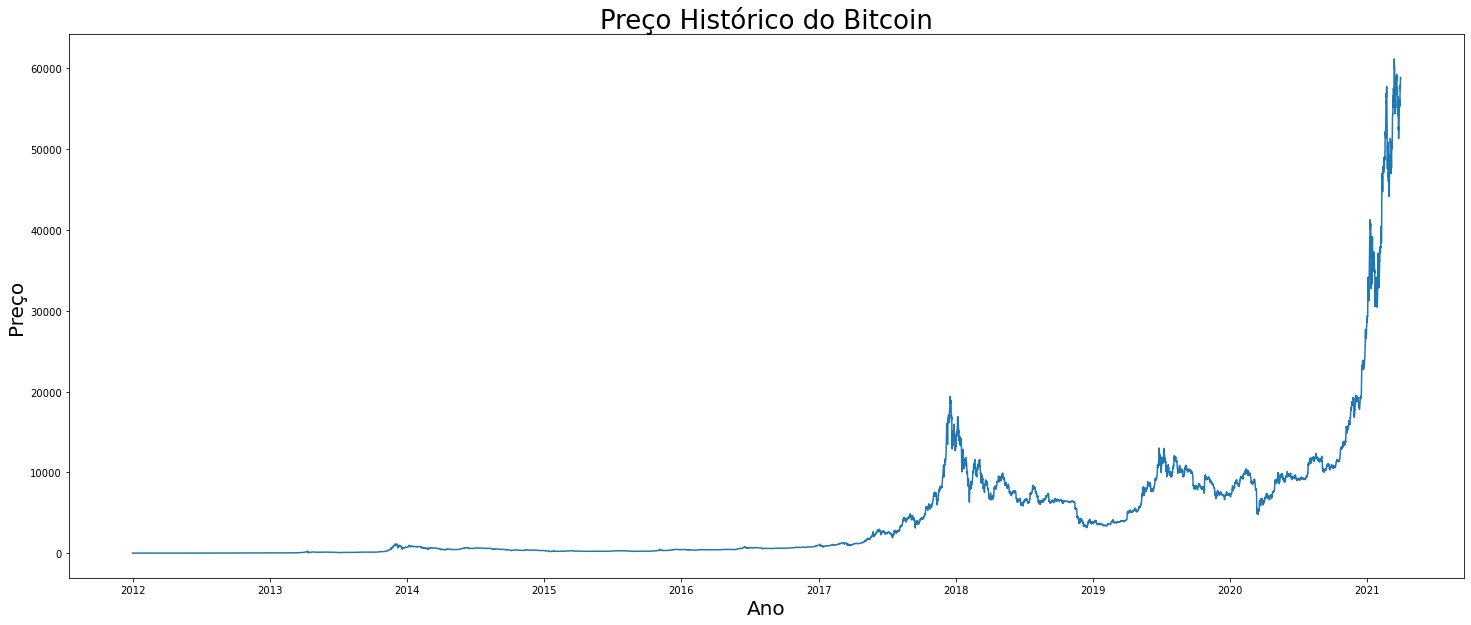

In [18]:
# plotagem do clássico gráfico do preço histórico do bitcoin

plt.figure(figsize=(25,10))
plt.plot(df)
plt.title('Preço Histórico do Bitcoin',fontsize=26)
plt.xlabel('Ano',fontsize=20)
plt.ylabel('Preço',fontsize=20)
plt.show()

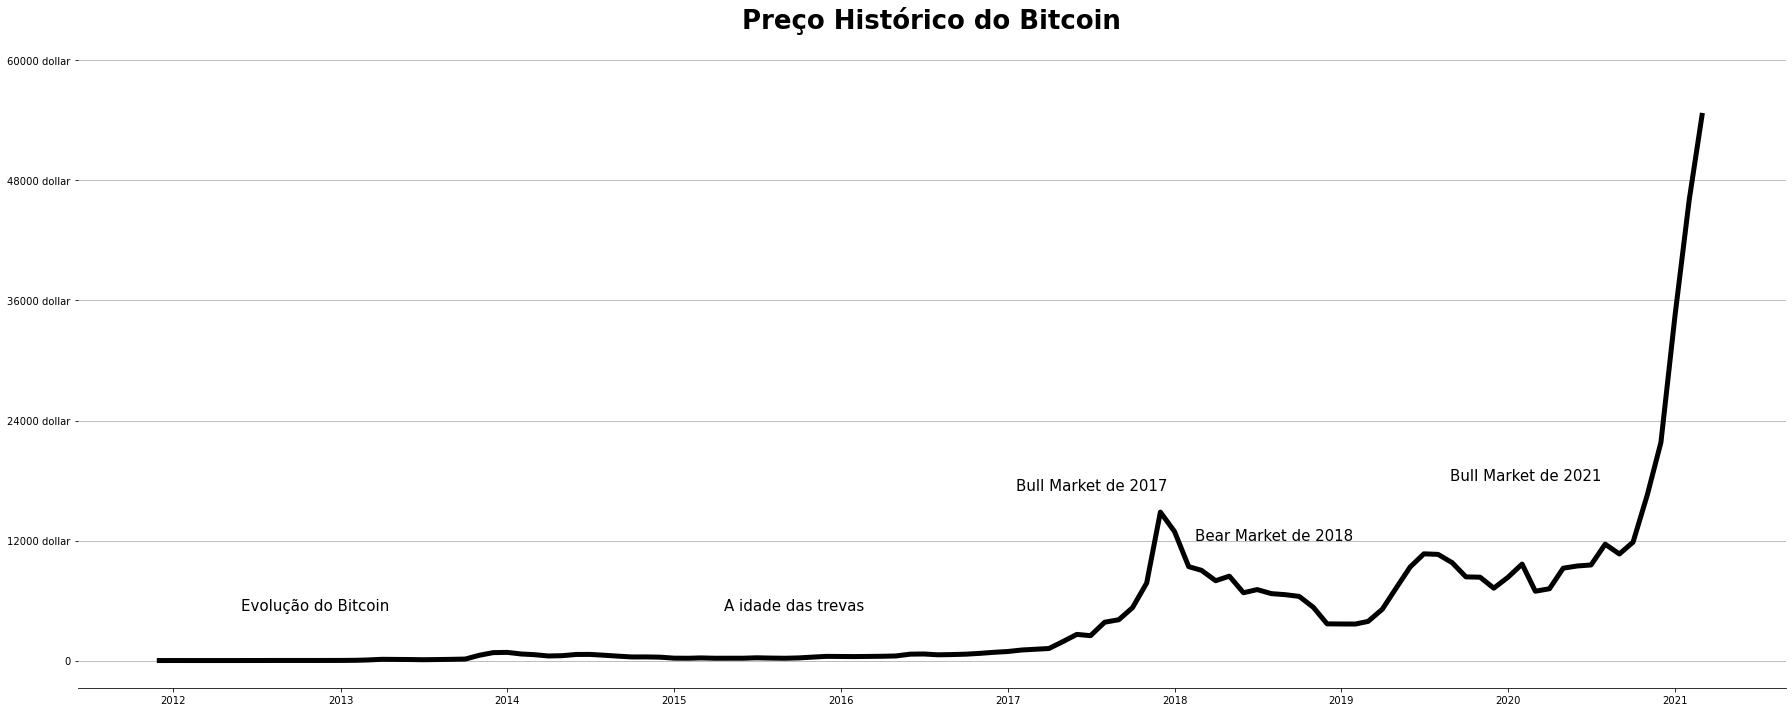

In [19]:
# é possível plotar um dado dimensionalizado os períodos com eventos importantes

fig, ax = plt.subplots(figsize=(25, 10), facecolor="w")

ax.plot(data['Close'], color = 'black', lw=5)

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

yticks = list(np.linspace(0, 60000, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y)} dollar" if y > 0 else "0" for y in yticks])

ax.grid(axis="y")

ax.set_title("Preço Histórico do Bitcoin", fontsize=26, fontweight="bold", pad=32)

font_textyear = {"fontsize": 15, "ha":"center"}

ax.axvspan(15300, 16050, fc="w", alpha=0.2)
ax.text(15650, 5000, "Evolução do Bitcoin", fontdict=font_textyear, color="black")
ax.axvspan(15300, 17200, fc="w", alpha=0.2)
ax.text(16700, 5000, "A idade das trevas", fontdict=font_textyear, color="black")
ax.axvspan(17200, 17500, fc="w", alpha=0.2)
ax.text(17350, 17000, "Bull Market de 2017", fontdict=font_textyear, color="black")
ax.axvspan(17500, 17900, fc="w", alpha=0.2)
ax.text(17750, 12000, "Bear Market de 2018", fontdict=font_textyear, color="black")
ax.axvspan(17900, 18700, fc="w", alpha=0.2)
ax.text(18300, 18000, "Bull Market de 2021", fontdict=font_textyear, color="black")
    
fig.tight_layout()